Bitcoin is a decentralized network and digital currency that uses a peer-to-peer system to verify and process transactions. Recently Bitcoin has received a lot of attention from the media and the public due to its recent price hike. As Bitcoin has been viewed as a financial asset and is traded through many cryptocurrency exchanges like a stock market, many researchers have studied various factors that affect the price of Bitcoin and the patterns behind its ﬂuctuations using various analytical and predictive methods.

Several predictive methods have been studied and compared for bitcoin price prediction using machine learning. In this file, we will be using the Facebook Prophet model for Bitcoin price prediction using machine learning.

The Facebook Prophet Library is an open-source additive regression model made available by Facebook for time-series predictions. While there is a more advanced version of the Prophet like **NeuralProphet** which is based on neural networks, we will be using the simplified version which uses machine learning techniques for the Bitcoin price prediction task.

The first step is to download the data. Now, let’s see how to download the latest data of bitcoin prices:

* Visit [Yahoo Finance](https://finance.yahoo.com/)
* Type **Bitcoin** in the search bar
* We will get a summary of bitcoin prices, then just click on the historical data and then click on download as shown in the image below.

In [1]:
import pandas as pd
from fbprophet import Prophet

The Facebook Prophet model only works with data that contains a string time-series format in a column called **ds** and continuous values in a column called **y**. So we need to create the data accordingly:

In [2]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]

In [3]:
df

,ds,y
0,2020-10-28,13271.285156
1,2020-10-29,13437.882813
2,2020-10-30,13546.522461
3,2020-10-31,13780.995117
4,2020-11-01,13737.109375
...,...,...
361,2021-10-24,60930.835938
362,2021-10-25,63039.824219
363,2021-10-26,60363.792969
364,2021-10-27,58482.386719


Now let’s fit the data into our model:

In [4]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


let’s make predictions. The `make_future_dataframe` method in Prophet model has a parameter named as **periods**, we can use it to set the amount of time we need to make predictions. Now let’s make predictions for the next **365 days**:

In [5]:
future = prophet.make_future_dataframe(periods=365)
future

,ds
0,2020-10-28
1,2020-10-29
2,2020-10-30
3,2020-10-31
4,2020-11-01
...,...
726,2022-10-24
727,2022-10-25
728,2022-10-26
729,2022-10-27


In [6]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-04-12,94386.970679,66127.033596,120839.417714
532,2022-04-13,94929.867432,65303.779692,122337.357227
533,2022-04-14,95045.794542,67371.067851,121986.226518
534,2022-04-15,95494.845886,66226.967993,123009.418370
535,2022-04-16,95681.660756,66302.453643,123651.882311
...,...,...,...,...
726,2022-10-24,137201.289662,44943.077582,225113.847929
727,2022-10-25,137201.499871,42640.876551,226019.979001
728,2022-10-26,137744.396624,42355.039121,226207.125953
729,2022-10-27,137860.323734,42702.880488,225869.507571


Now let’s plot our predictions:

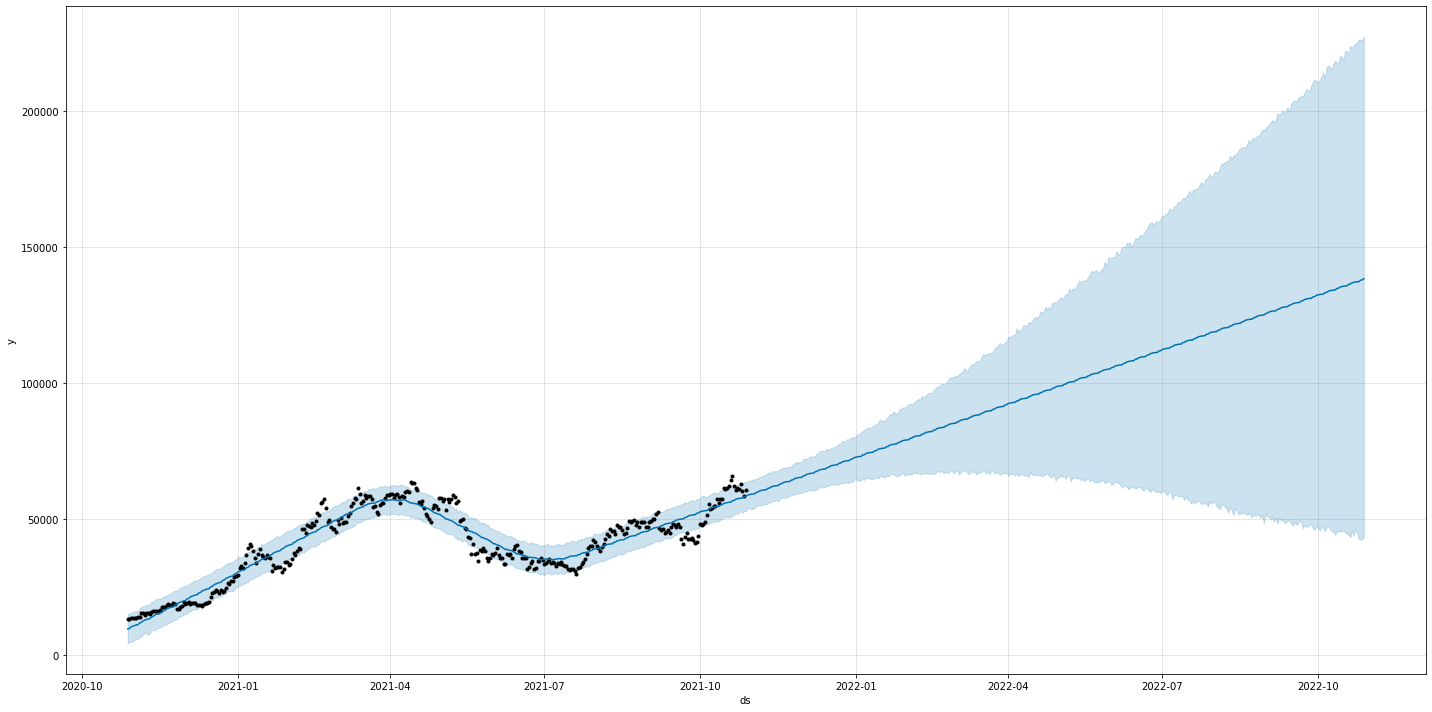

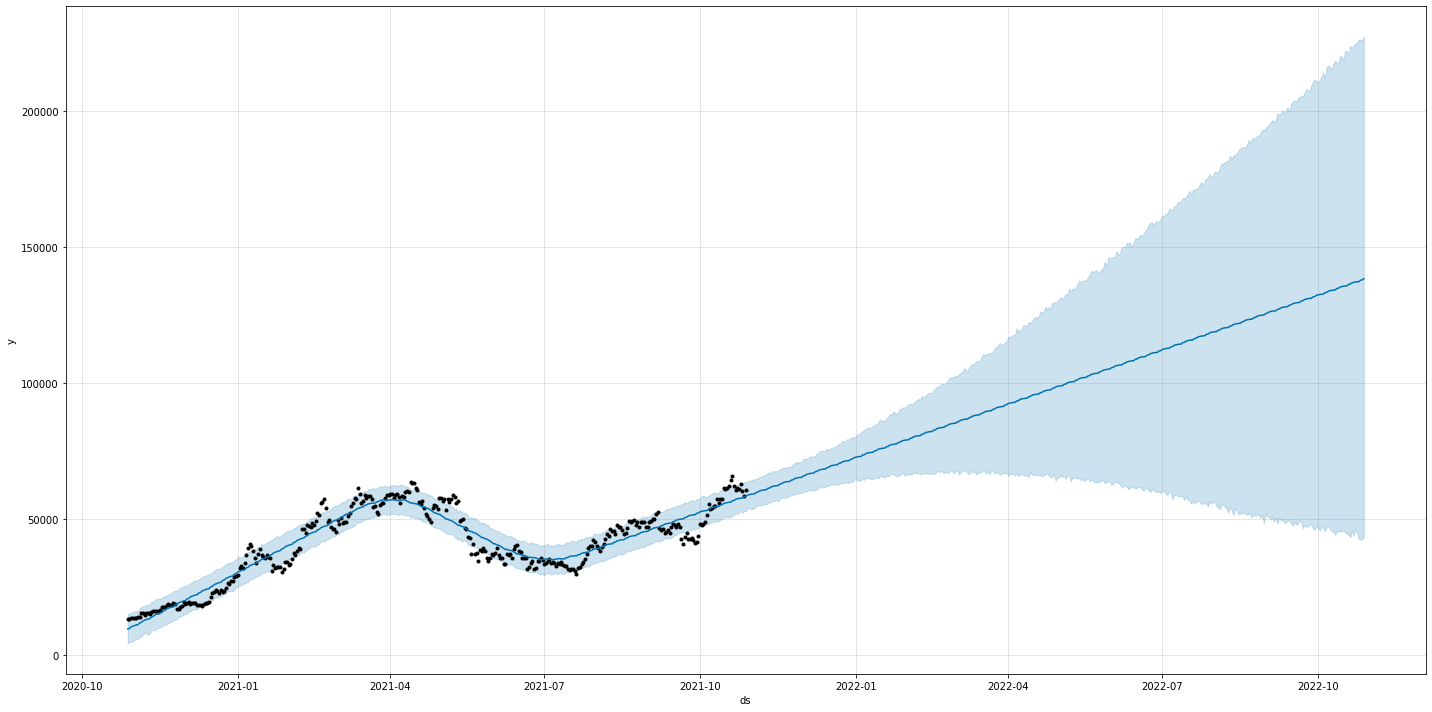

In [7]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))

### Conclusion
There are several interpretations of the forecasts calculated by the Facebook prophet model like the current momentum for the bitcoin prices has sky-rocketed, and still, we are likely to see a very rapid increase in the prices of bitcoin.